## Final Project Submission

Please fill out:
* Student name: DARVIN KERUBO
* Student pace:   part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

1)I will import the necessary libraries

In [4]:
# importing appropriate libraries
import requests
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

2) Data extraction and data analysis

In [6]:
#Title contains information about the genre and title of the movie
imdb_title_basics = pd.read_csv("/content/imdb.title.basics.csv.gz")
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


Ratings contains the ratings of the movies

In [7]:
imdb_title_ratings = pd.read_csv('/content/imdb.title.ratings.csv.gz')
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Budget contains the movie gross data


In [8]:
tn_movie_budgets = pd.read_csv("/content/tn.movie_budgets.csv.gz")
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


4. I will start data exploration to know each of the datasets that I am working with

In [9]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
imdb_title_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Data Cleaning**

On looking at the three datasets, the title dataset contains null values. 
In Budget datasets, the release_date column is in the object, and we need to convert it into DateTime format, and the domestic and worldwide gross have to be converted from object to float values.

Removing the null values in title


In [12]:
imdb_title_basics.isnull()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
146139,False,False,False,False,False,False
146140,False,False,False,False,True,False
146141,False,False,False,False,True,False
146142,False,False,False,False,False,True


In [13]:
imdb_title_basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [14]:
imdb_title_basics.dropna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


The null values in the title data set have been dropped

I will also check if the ratings dataset has null values

In [15]:
imdb_title_ratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

I will also check for null values in the budget dataset

In [16]:
tn_movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

It doesnt have ....Next I will move to changing the release_date column from object to datetime

In [17]:
tn_movie_budgets["release_date"]
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [18]:
tn_movie_budgets["date"] = pd.to_datetime(tn_movie_budgets["release_date"])

In [19]:
tn_movie_budgets.dtypes

id                            int64
release_date                 object
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
date                 datetime64[ns]
dtype: object

**so another column has been created with the datetime format, next I will drop the release date column and work with the date column**

In [20]:
tn_movie_budgets.drop(["release_date"], axis = 1)

,id,movie,production_budget,domestic_gross,worldwide_gross,date
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009-12-18
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15
...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0,2018-12-31
5778,79,Following,"$6,000","$48,482","$240,495",1999-04-02
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005-07-13
5780,81,A Plague So Pleasant,"$1,400",$0,$0,2015-09-29


as you can see the release_date column has been dropped but the information is in the date column

Next I will change the domestic_gross and worldwide_gross from object to float

In [21]:
tn_movie_budgets["domestic_gross"]=tn_movie_budgets["domestic_gross"].map(lambda x: str(x))
import string
tn_movie_budgets["domestic_gross"]=tn_movie_budgets["domestic_gross"].map(lambda x: x.strip(string.punctuation))
tn_movie_budgets["domestic_gross"]=tn_movie_budgets["domestic_gross"].str.replace(",","").astype(float)

In [22]:
tn_movie_budgets["worldwide_gross"]=tn_movie_budgets["worldwide_gross"].map(lambda x: str(x))
import string
tn_movie_budgets["worldwide_gross"]=tn_movie_budgets["worldwide_gross"].map(lambda x: x.strip(string.punctuation))
tn_movie_budgets["worldwide_gross"]=tn_movie_budgets["worldwide_gross"].str.replace(",","").astype(float)

In [23]:
tn_movie_budgets.dtypes

id                            int64
release_date                 object
movie                        object
production_budget            object
domestic_gross              float64
worldwide_gross             float64
date                 datetime64[ns]
dtype: object

**It has been changed**

**DATA ANALYSIS**

now that i have cleaned my data, I will move to analysis by first merging same datasets, ‘title and ‘rating’ dataset, both have the ‘tconst’ column as common. Hence I joined the ‘title’ and ‘rating’ datasets using the inner joint and joined them to the ‘budget’ dataset using the left joint. I joined the dataset on ‘budget’ as they share the common movie title column.

In [24]:
imdball = imdb_title_basics.merge(imdb_title_ratings, on = 'tconst', how = 'inner')
imdball

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


I have realized that we have two titles so I will drop 1

I also forget to check for duplicates so I will do that here

In [25]:
imdball.drop_duplicates()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [26]:
#rename original_title to movie in order to merge to budget dataset
imdball = imdball.rename(columns={'original_title':'movie'})
imdball

,tconst,primary_title,movie,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [27]:
analyze_imdball = pd.merge(imdball, tn_movie_budgets, on = ['movie',], how = 'left')
analyze_imdball

,tconst,primary_title,movie,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,date
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaN,NaN,NaN,NaN,NaT
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,NaN,NaN,NaN,NaN,NaN,NaT
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaN,NaN,NaN,NaN,NaT
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,NaN,NaN,NaN,NaN,NaN,NaT
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73954,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,NaN,NaN,NaN,NaN,NaN,NaT
73955,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,NaN,NaN,NaN,NaN,NaN,NaT
73956,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,NaN,NaN,NaN,NaN,NaN,NaT
73957,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5,NaN,NaN,NaN,NaN,NaN,NaT


I will analyze the genre column

In [54]:
analyze_imdball = analyze_imdball.query("averagerating == 10")
print(imdball["genres"].value_counts().head(10))
                      


Drama                   11612
Documentary             10313
Comedy                   5613
Horror                   2692
Comedy,Drama             2617
Thriller                 1555
Drama,Romance            1510
Comedy,Romance           1236
Comedy,Drama,Romance     1208
Horror,Thriller          1004
Name: genres, dtype: int64


Create Plot

Text(0.5, 1.0, 'genrelist vs averagerating')

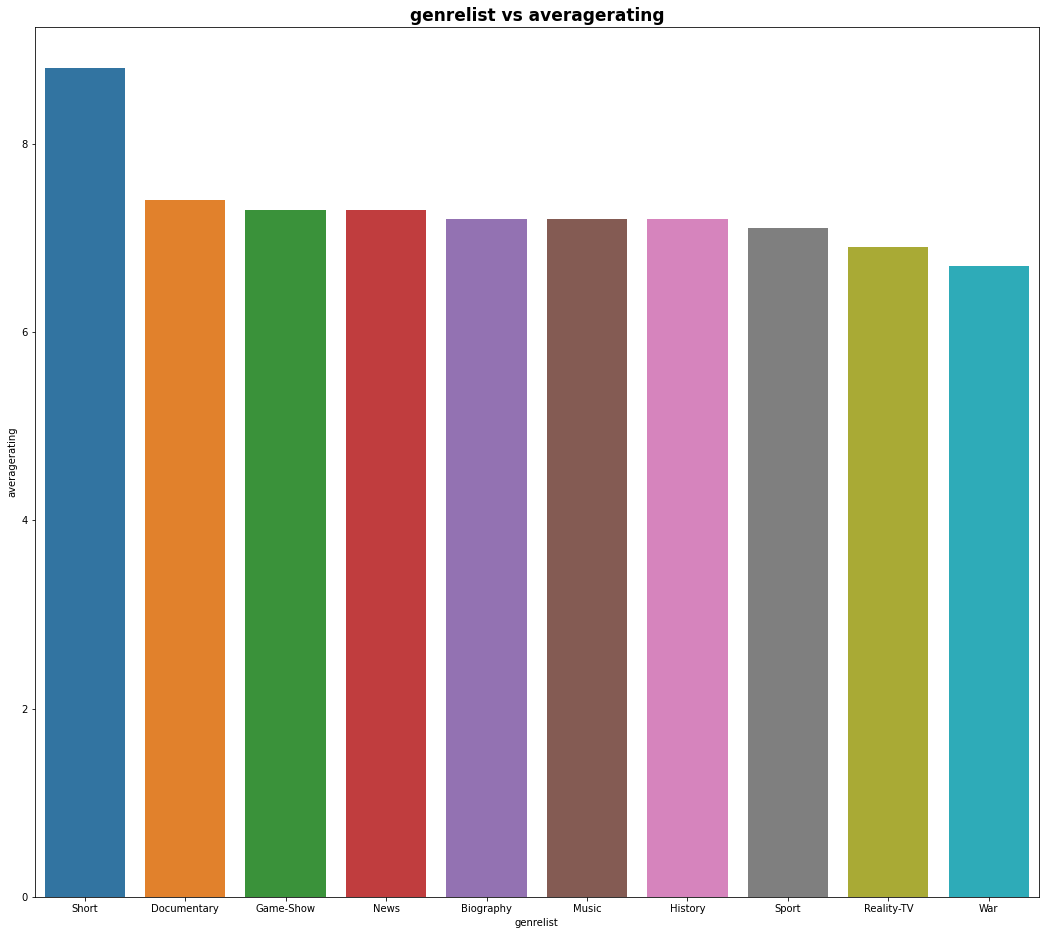

In [43]:
df=pd.DataFrame(genre_averagerating)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genrelist",y="averagerating",data=df)
plt.title("genrelist vs averagerating",fontsize=17,weight="bold")

Genres with the highest rating has been plotted

In [44]:
analyze_imdball.dtypes

tconst              object
primary_title       object
movie               object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
genrelist           object
dtype: object

In [55]:
multiplegenres = analyze_imdball.query("averagerating == 10")
print(multiplegenres["genres"].value_counts().head(10))
                      


Documentary            11
Comedy,Drama            2
Crime,Documentary       2
Documentary,History     2
Adventure,Comedy        2
Drama                   1
Name: genres, dtype: int64


Text(0.5, 1.0, 'genres vs averagerating')

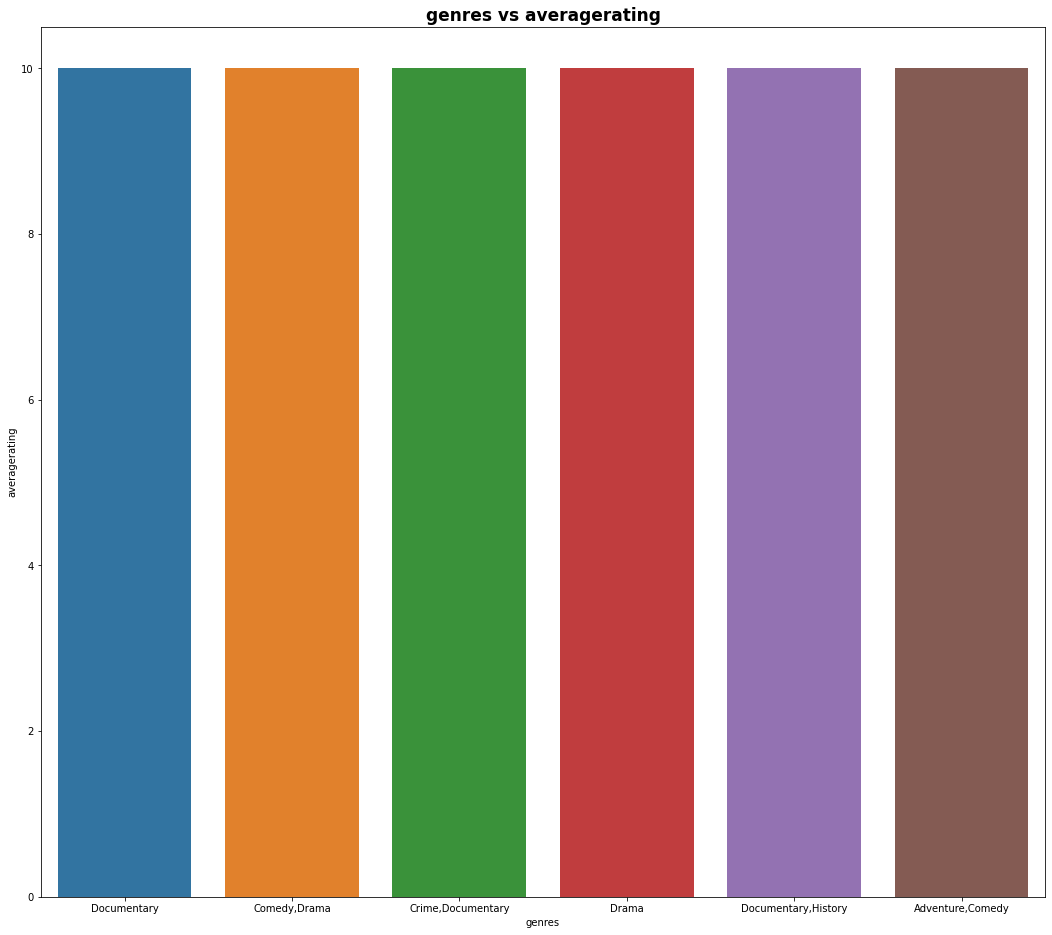

In [56]:
#plotting the multiplegenres
df1=pd.DataFrame(multiplegenres)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genres",y="averagerating",data=df1)
plt.title("genres vs averagerating",fontsize=17,weight="bold")

Movies with multiple genres are likely to succeed

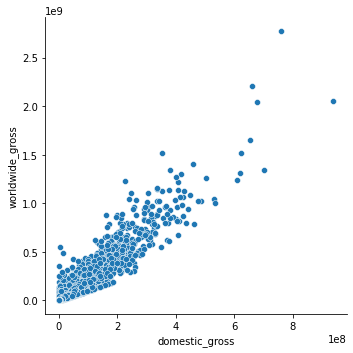

In [33]:
sns.relplot(data=tn_movie_budgets ,x="domestic_gross",y="worldwide_gross")

Local movies perform better

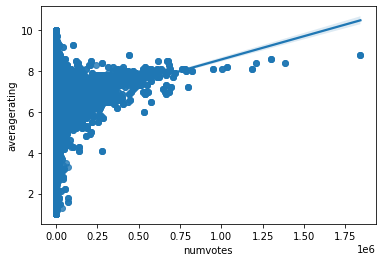

In [34]:
sns.regplot(data=analyze_imdball ,x="numvotes",y="averagerating")

voting for movies increases their ratings